In [1]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import preprocessing

#importing datasets  
df= pd.read_csv('data.csv') 
print(df.head())

FileNotFoundError: [Errno 2] No such file or directory: 'data.csv'

In [3]:
df=df.drop(['EDUCATION_SCHOOL_NAME','GRADUATE_DATE','TOTAL_YEARS_GIVING'], axis=1)

In [4]:
df.set_index('ID')

,LARGEST_GIFT_AMOUNT,BIRTH_DATE,FIRST_GIFT_DATE,LARGEST_GIFT_DATE,LAST_GIFT_DATE,TOTAL_GIFT_AMOUNT,TOTAL_NUMBER_GIFTS,TOTAL_GIVING_CAPACITY,TOTAL_INCOME,TOTAL_NETWORTH,TOTAL_DONATIONS,TOTAL_EAD,LARGEST_REALEST_VALUE,TOTAL_NO_EVENTS_PARTICIPATED,GENDER,FIRST_GIFT_AMOUNT,LAST_GIFT_AMOUNT
ID,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0.0,NaN,NaN,NaN
2,NaN,12/1/1957,NaN,NaN,NaN,NaN,NaN,138967,187500,2765944,0,4985,605537,0.0,M,NaN,NaN
3,NaN,12/1/1965,NaN,NaN,NaN,NaN,NaN,15929,37500,10924,3179,1152,0,0.0,M,NaN,NaN
4,135.0,6/1/1977,3/1/2011,3/1/2011,3/1/2011,135.0,1.0,38055,47500,496523,135,1156,539909,0.0,M,135.0,135.0
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26910,NaN,6/1/1948,NaN,NaN,NaN,NaN,NaN,86751,125000,1005697,0,3672,435022,0.0,F,NaN,NaN
26911,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0.0,M,NaN,NaN
26912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0.0,M,NaN,NaN


In [5]:
df = df.dropna()
df.set_index('ID')

,LARGEST_GIFT_AMOUNT,BIRTH_DATE,FIRST_GIFT_DATE,LARGEST_GIFT_DATE,LAST_GIFT_DATE,TOTAL_GIFT_AMOUNT,TOTAL_NUMBER_GIFTS,TOTAL_GIVING_CAPACITY,TOTAL_INCOME,TOTAL_NETWORTH,TOTAL_DONATIONS,TOTAL_EAD,LARGEST_REALEST_VALUE,TOTAL_NO_EVENTS_PARTICIPATED,GENDER,FIRST_GIFT_AMOUNT,LAST_GIFT_AMOUNT
ID,,,,,,,,,,,,,,,,,
4,135.0,6/1/1977,3/1/2011,3/1/2011,3/1/2011,135.0,1.0,38055,47500,496523,135,1156,539909,0.0,M,135.0,135.0
13,30.0,4/1/2028,3/10/2009,3/10/2009,3/16/2011,50.0,2.0,47550,62500,241982,50,1972,0,0.0,F,30.0,20.0
20,2500.0,1/1/1959,9/2/2021,9/2/2021,9/2/2021,2500.0,1.0,17400819,2802980,197182528,16533,445228,2393990,1.0,M,2500.0,2500.0
21,50.0,12/1/1957,3/8/2012,3/8/2012,3/8/2012,50.0,1.0,90861,187500,853348,50,2403,241225,0.0,M,50.0,50.0
24,7200.0,11/23/1938,3/2/2000,2/24/2006,11/30/2006,18200.0,3.0,260330,375000,3170188,18200,8560,267601,0.0,M,6000.0,5400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26835,600.0,4/1/1983,3/1/2006,11/17/2006,11/17/2006,1200.0,2.0,29490,125000,202146,1200,1639,140790,0.0,M,600.0,600.0
26861,180.0,8/1/1981,6/13/2011,6/13/2011,6/13/2011,180.0,1.0,14050,73000,28183,180,1335,0,0.0,F,180.0,180.0
26864,180.0,12/1/1961,3/1/2010,3/1/2014,11/10/2014,855.0,6.0,85872,87500,1647468,855,3016,711326,0.0,M,180.0,15.0


In [6]:
df['BIRTH_DATE']= pd.to_datetime(df['BIRTH_DATE'])

In [7]:
from datetime import date
 
def calculateAge(birthDate):
    today = date.today()
    age = today.year - birthDate.year - ((today.month, today.day) < (birthDate.month, birthDate.day))
 
    return age

In [8]:
df['age']=df['BIRTH_DATE'].apply(calculateAge)

In [9]:
df['age']

3        45
12       -5
19       64
20       65
23       84
         ..
26834    40
26860    41
26863    61
26877    83
26880    63
Name: age, Length: 3277, dtype: int64

In [10]:
df

,ID,LARGEST_GIFT_AMOUNT,BIRTH_DATE,FIRST_GIFT_DATE,LARGEST_GIFT_DATE,LAST_GIFT_DATE,TOTAL_GIFT_AMOUNT,TOTAL_NUMBER_GIFTS,TOTAL_GIVING_CAPACITY,TOTAL_INCOME,TOTAL_NETWORTH,TOTAL_DONATIONS,TOTAL_EAD,LARGEST_REALEST_VALUE,TOTAL_NO_EVENTS_PARTICIPATED,GENDER,FIRST_GIFT_AMOUNT,LAST_GIFT_AMOUNT,age
3,4,135.0,1977-06-01,3/1/2011,3/1/2011,3/1/2011,135.0,1.0,38055,47500,496523,135,1156,539909,0.0,M,135.0,135.0,45
12,13,30.0,2028-04-01,3/10/2009,3/10/2009,3/16/2011,50.0,2.0,47550,62500,241982,50,1972,0,0.0,F,30.0,20.0,-5
19,20,2500.0,1959-01-01,9/2/2021,9/2/2021,9/2/2021,2500.0,1.0,17400819,2802980,197182528,16533,445228,2393990,1.0,M,2500.0,2500.0,64
20,21,50.0,1957-12-01,3/8/2012,3/8/2012,3/8/2012,50.0,1.0,90861,187500,853348,50,2403,241225,0.0,M,50.0,50.0,65
23,24,7200.0,1938-11-23,3/2/2000,2/24/2006,11/30/2006,18200.0,3.0,260330,375000,3170188,18200,8560,267601,0.0,M,6000.0,5400.0,84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26834,26835,600.0,1983-04-01,3/1/2006,11/17/2006,11/17/2006,1200.0,2.0,29490,125000,202146,1200,1639,140790,0.0,M,600.0,600.0,40
26860,26861,180.0,1981-08-01,6/13/2011,6/13/2011,6/13/2011,180.0,1.0,14050,73000,28183,180,1335,0,0.0,F,180.0,180.0,41
26863,26864,180.0,1961-12-01,3/1/2010,3/1/2014,11/10/2014,855.0,6.0,85872,87500,1647468,855,3016,711326,0.0,M,180.0,15.0,61
26877,26878,50.0,1940-04-01,1/7/2015,1/7/2015,1/7/2015,50.0,1.0,159362,225000,2157237,50,6157,486230,0.0,F,50.0,50.0,83


In [11]:
ind=df[df['age']<0]['ID']
ind

12          13
34          35
315        316
331        332
364        365
         ...  
25680    25681
26142    26143
26251    26252
26256    26257
26394    26395
Name: ID, Length: 93, dtype: int64

In [12]:
newdf = df.drop(ind-1, axis='rows')

In [13]:
newdf

,ID,LARGEST_GIFT_AMOUNT,BIRTH_DATE,FIRST_GIFT_DATE,LARGEST_GIFT_DATE,LAST_GIFT_DATE,TOTAL_GIFT_AMOUNT,TOTAL_NUMBER_GIFTS,TOTAL_GIVING_CAPACITY,TOTAL_INCOME,TOTAL_NETWORTH,TOTAL_DONATIONS,TOTAL_EAD,LARGEST_REALEST_VALUE,TOTAL_NO_EVENTS_PARTICIPATED,GENDER,FIRST_GIFT_AMOUNT,LAST_GIFT_AMOUNT,age
3,4,135.0,1977-06-01,3/1/2011,3/1/2011,3/1/2011,135.0,1.0,38055,47500,496523,135,1156,539909,0.0,M,135.0,135.0,45
19,20,2500.0,1959-01-01,9/2/2021,9/2/2021,9/2/2021,2500.0,1.0,17400819,2802980,197182528,16533,445228,2393990,1.0,M,2500.0,2500.0,64
20,21,50.0,1957-12-01,3/8/2012,3/8/2012,3/8/2012,50.0,1.0,90861,187500,853348,50,2403,241225,0.0,M,50.0,50.0,65
23,24,7200.0,1938-11-23,3/2/2000,2/24/2006,11/30/2006,18200.0,3.0,260330,375000,3170188,18200,8560,267601,0.0,M,6000.0,5400.0,84
27,28,240.0,1946-10-01,2/25/2000,2/27/2004,12/22/2009,1010.0,7.0,54790,71000,535916,3225,1766,278708,0.0,M,144.0,48.0,76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26834,26835,600.0,1983-04-01,3/1/2006,11/17/2006,11/17/2006,1200.0,2.0,29490,125000,202146,1200,1639,140790,0.0,M,600.0,600.0,40
26860,26861,180.0,1981-08-01,6/13/2011,6/13/2011,6/13/2011,180.0,1.0,14050,73000,28183,180,1335,0,0.0,F,180.0,180.0,41
26863,26864,180.0,1961-12-01,3/1/2010,3/1/2014,11/10/2014,855.0,6.0,85872,87500,1647468,855,3016,711326,0.0,M,180.0,15.0,61
26877,26878,50.0,1940-04-01,1/7/2015,1/7/2015,1/7/2015,50.0,1.0,159362,225000,2157237,50,6157,486230,0.0,F,50.0,50.0,83


In [14]:
newdf['Financially_In_Dept']=np.where(newdf["TOTAL_INCOME"]>newdf["TOTAL_NETWORTH"],1,0)

In [15]:
newdf

,ID,LARGEST_GIFT_AMOUNT,BIRTH_DATE,FIRST_GIFT_DATE,LARGEST_GIFT_DATE,LAST_GIFT_DATE,TOTAL_GIFT_AMOUNT,TOTAL_NUMBER_GIFTS,TOTAL_GIVING_CAPACITY,TOTAL_INCOME,TOTAL_NETWORTH,TOTAL_DONATIONS,TOTAL_EAD,LARGEST_REALEST_VALUE,TOTAL_NO_EVENTS_PARTICIPATED,GENDER,FIRST_GIFT_AMOUNT,LAST_GIFT_AMOUNT,age,Financially_In_Dept
3,4,135.0,1977-06-01,3/1/2011,3/1/2011,3/1/2011,135.0,1.0,38055,47500,496523,135,1156,539909,0.0,M,135.0,135.0,45,0
19,20,2500.0,1959-01-01,9/2/2021,9/2/2021,9/2/2021,2500.0,1.0,17400819,2802980,197182528,16533,445228,2393990,1.0,M,2500.0,2500.0,64,0
20,21,50.0,1957-12-01,3/8/2012,3/8/2012,3/8/2012,50.0,1.0,90861,187500,853348,50,2403,241225,0.0,M,50.0,50.0,65,0
23,24,7200.0,1938-11-23,3/2/2000,2/24/2006,11/30/2006,18200.0,3.0,260330,375000,3170188,18200,8560,267601,0.0,M,6000.0,5400.0,84,0
27,28,240.0,1946-10-01,2/25/2000,2/27/2004,12/22/2009,1010.0,7.0,54790,71000,535916,3225,1766,278708,0.0,M,144.0,48.0,76,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26834,26835,600.0,1983-04-01,3/1/2006,11/17/2006,11/17/2006,1200.0,2.0,29490,125000,202146,1200,1639,140790,0.0,M,600.0,600.0,40,0
26860,26861,180.0,1981-08-01,6/13/2011,6/13/2011,6/13/2011,180.0,1.0,14050,73000,28183,180,1335,0,0.0,F,180.0,180.0,41,1
26863,26864,180.0,1961-12-01,3/1/2010,3/1/2014,11/10/2014,855.0,6.0,85872,87500,1647468,855,3016,711326,0.0,M,180.0,15.0,61,0
26877,26878,50.0,1940-04-01,1/7/2015,1/7/2015,1/7/2015,50.0,1.0,159362,225000,2157237,50,6157,486230,0.0,F,50.0,50.0,83,0


In [16]:
newdf['Avg_Gift_Amount']= newdf["TOTAL_GIFT_AMOUNT"] / newdf["TOTAL_NUMBER_GIFTS"]

In [17]:
newdf

,ID,LARGEST_GIFT_AMOUNT,BIRTH_DATE,FIRST_GIFT_DATE,LARGEST_GIFT_DATE,LAST_GIFT_DATE,TOTAL_GIFT_AMOUNT,TOTAL_NUMBER_GIFTS,TOTAL_GIVING_CAPACITY,TOTAL_INCOME,...,TOTAL_DONATIONS,TOTAL_EAD,LARGEST_REALEST_VALUE,TOTAL_NO_EVENTS_PARTICIPATED,GENDER,FIRST_GIFT_AMOUNT,LAST_GIFT_AMOUNT,age,Financially_In_Dept,Avg_Gift_Amount
3,4,135.0,1977-06-01,3/1/2011,3/1/2011,3/1/2011,135.0,1.0,38055,47500,...,135,1156,539909,0.0,M,135.0,135.0,45,0,135.000000
19,20,2500.0,1959-01-01,9/2/2021,9/2/2021,9/2/2021,2500.0,1.0,17400819,2802980,...,16533,445228,2393990,1.0,M,2500.0,2500.0,64,0,2500.000000
20,21,50.0,1957-12-01,3/8/2012,3/8/2012,3/8/2012,50.0,1.0,90861,187500,...,50,2403,241225,0.0,M,50.0,50.0,65,0,50.000000
23,24,7200.0,1938-11-23,3/2/2000,2/24/2006,11/30/2006,18200.0,3.0,260330,375000,...,18200,8560,267601,0.0,M,6000.0,5400.0,84,0,6066.666667
27,28,240.0,1946-10-01,2/25/2000,2/27/2004,12/22/2009,1010.0,7.0,54790,71000,...,3225,1766,278708,0.0,M,144.0,48.0,76,0,144.285714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26834,26835,600.0,1983-04-01,3/1/2006,11/17/2006,11/17/2006,1200.0,2.0,29490,125000,...,1200,1639,140790,0.0,M,600.0,600.0,40,0,600.000000
26860,26861,180.0,1981-08-01,6/13/2011,6/13/2011,6/13/2011,180.0,1.0,14050,73000,...,180,1335,0,0.0,F,180.0,180.0,41,1,180.000000
26863,26864,180.0,1961-12-01,3/1/2010,3/1/2014,11/10/2014,855.0,6.0,85872,87500,...,855,3016,711326,0.0,M,180.0,15.0,61,0,142.500000
26877,26878,50.0,1940-04-01,1/7/2015,1/7/2015,1/7/2015,50.0,1.0,159362,225000,...,50,6157,486230,0.0,F,50.0,50.0,83,0,50.000000


In [18]:
newdf['gifting_Capcity']= newdf["TOTAL_GIFT_AMOUNT"] / newdf["TOTAL_GIVING_CAPACITY"]

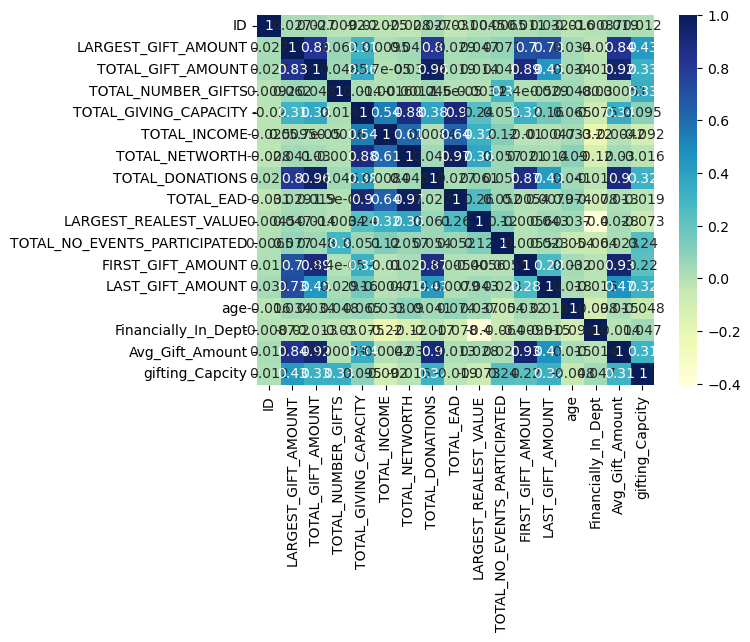

In [19]:
import matplotlib.pyplot as mp
import pandas as pd
import seaborn as sb
  
# plotting correlation heatmap
dataplot = sb.heatmap(newdf.corr(method='pearson', min_periods=1), cmap="YlGnBu", annot=True)

mp.show()

In [20]:
newdf.corr(method='pearson', min_periods=1)  
# displaying heatmap

,ID,LARGEST_GIFT_AMOUNT,TOTAL_GIFT_AMOUNT,TOTAL_NUMBER_GIFTS,TOTAL_GIVING_CAPACITY,TOTAL_INCOME,TOTAL_NETWORTH,TOTAL_DONATIONS,TOTAL_EAD,LARGEST_REALEST_VALUE,TOTAL_NO_EVENTS_PARTICIPATED,FIRST_GIFT_AMOUNT,LAST_GIFT_AMOUNT,age,Financially_In_Dept,Avg_Gift_Amount,gifting_Capcity
ID,1.000000,0.027264,0.027224,-0.009153,-0.019608,-0.024821,-0.028165,0.026749,-0.031051,-0.004540,0.006481,0.010715,0.032220,-0.015814,-0.008717,0.019283,0.012086
LARGEST_GIFT_AMOUNT,0.027264,1.000000,0.827632,0.061521,0.306134,0.009535,0.041471,0.803138,0.028733,0.046536,0.077367,0.700010,0.726274,0.033526,-0.020105,0.838272,0.426375
TOTAL_GIFT_AMOUNT,0.027224,0.827632,1.000000,0.047708,0.360136,0.000057,0.029956,0.956996,0.019465,0.013633,0.048341,0.887706,0.445813,0.033930,-0.012764,0.924179,0.326066
TOTAL_NUMBER_GIFTS,-0.009153,0.061521,0.047708,1.000000,0.013720,-0.001611,-0.001191,0.045618,0.000015,-0.003413,0.296604,0.000024,0.028921,0.048095,-0.029849,0.000512,0.334210
TOTAL_GIVING_CAPACITY,-0.019608,0.306134,0.360136,0.013720,1.000000,0.543161,0.881466,0.382831,0.904616,0.235307,0.051477,0.323148,0.163353,0.064912,-0.075074,0.338432,0.095253
TOTAL_INCOME,-0.024821,0.009535,0.000057,-0.001611,0.543161,1.000000,0.613298,0.008352,0.635334,0.323582,0.116238,-0.010195,-0.004725,0.033371,-0.219725,-0.004193,-0.091531
TOTAL_NETWORTH,-0.028165,0.041471,0.029956,-0.001191,0.881466,0.613298,1.000000,0.045622,0.970636,0.364741,0.057440,0.021372,0.014061,0.089831,-0.123046,0.029707,-0.016190
TOTAL_DONATIONS,0.026749,0.803138,0.956996,0.045618,0.382831,0.008352,0.045622,1.000000,0.027139,0.060688,0.054354,0.865774,0.427331,0.040975,-0.016928,0.897461,0.315478
TOTAL_EAD,-0.031051,0.028733,0.019465,0.000015,0.904616,0.635334,0.970636,0.027139,1.000000,0.258151,0.052083,0.005420,0.007878,0.073506,-0.077613,0.012639,-0.019173
LARGEST_REALEST_VALUE,-0.004540,0.046536,0.013633,-0.003413,0.235307,0.323582,0.364741,0.060688,0.258151,1.000000,0.117911,-0.005649,0.042919,0.037474,-0.403697,0.027873,-0.072925


In [21]:
newdf=newdf.drop(['TOTAL_GIFT_AMOUNT','TOTAL_NETWORTH','FIRST_GIFT_AMOUNT'], axis=1)

In [22]:
newdf.corr(method='pearson', min_periods=1)  

,ID,LARGEST_GIFT_AMOUNT,TOTAL_NUMBER_GIFTS,TOTAL_GIVING_CAPACITY,TOTAL_INCOME,TOTAL_DONATIONS,TOTAL_EAD,LARGEST_REALEST_VALUE,TOTAL_NO_EVENTS_PARTICIPATED,LAST_GIFT_AMOUNT,age,Financially_In_Dept,Avg_Gift_Amount,gifting_Capcity
ID,1.000000,0.027264,-0.009153,-0.019608,-0.024821,0.026749,-0.031051,-0.004540,0.006481,0.032220,-0.015814,-0.008717,0.019283,0.012086
LARGEST_GIFT_AMOUNT,0.027264,1.000000,0.061521,0.306134,0.009535,0.803138,0.028733,0.046536,0.077367,0.726274,0.033526,-0.020105,0.838272,0.426375
TOTAL_NUMBER_GIFTS,-0.009153,0.061521,1.000000,0.013720,-0.001611,0.045618,0.000015,-0.003413,0.296604,0.028921,0.048095,-0.029849,0.000512,0.334210
TOTAL_GIVING_CAPACITY,-0.019608,0.306134,0.013720,1.000000,0.543161,0.382831,0.904616,0.235307,0.051477,0.163353,0.064912,-0.075074,0.338432,0.095253
TOTAL_INCOME,-0.024821,0.009535,-0.001611,0.543161,1.000000,0.008352,0.635334,0.323582,0.116238,-0.004725,0.033371,-0.219725,-0.004193,-0.091531
TOTAL_DONATIONS,0.026749,0.803138,0.045618,0.382831,0.008352,1.000000,0.027139,0.060688,0.054354,0.427331,0.040975,-0.016928,0.897461,0.315478
TOTAL_EAD,-0.031051,0.028733,0.000015,0.904616,0.635334,0.027139,1.000000,0.258151,0.052083,0.007878,0.073506,-0.077613,0.012639,-0.019173
LARGEST_REALEST_VALUE,-0.004540,0.046536,-0.003413,0.235307,0.323582,0.060688,0.258151,1.000000,0.117911,0.042919,0.037474,-0.403697,0.027873,-0.072925
TOTAL_NO_EVENTS_PARTICIPATED,0.006481,0.077367,0.296604,0.051477,0.116238,0.054354,0.052083,0.117911,1.000000,0.022982,-0.054340,-0.064322,0.023237,0.242004
LAST_GIFT_AMOUNT,0.032220,0.726274,0.028921,0.163353,-0.004725,0.427331,0.007878,0.042919,0.022982,1.000000,0.017594,-0.014653,0.466154,0.323802


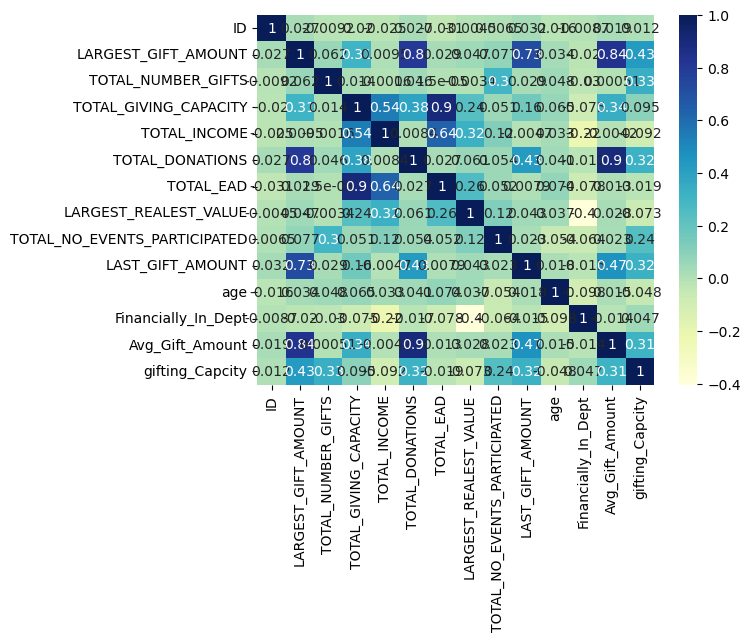

In [23]:
import matplotlib.pyplot as mp
import pandas as pd
import seaborn as sb
  
# plotting correlation heatmap
dataplot = sb.heatmap(newdf.corr(method='pearson', min_periods=1), cmap="YlGnBu", annot=True)

mp.show()

In [24]:
newdf

,ID,LARGEST_GIFT_AMOUNT,BIRTH_DATE,FIRST_GIFT_DATE,LARGEST_GIFT_DATE,LAST_GIFT_DATE,TOTAL_NUMBER_GIFTS,TOTAL_GIVING_CAPACITY,TOTAL_INCOME,TOTAL_DONATIONS,TOTAL_EAD,LARGEST_REALEST_VALUE,TOTAL_NO_EVENTS_PARTICIPATED,GENDER,LAST_GIFT_AMOUNT,age,Financially_In_Dept,Avg_Gift_Amount,gifting_Capcity
3,4,135.0,1977-06-01,3/1/2011,3/1/2011,3/1/2011,1.0,38055,47500,135,1156,539909,0.0,M,135.0,45,0,135.000000,0.003547
19,20,2500.0,1959-01-01,9/2/2021,9/2/2021,9/2/2021,1.0,17400819,2802980,16533,445228,2393990,1.0,M,2500.0,64,0,2500.000000,0.000144
20,21,50.0,1957-12-01,3/8/2012,3/8/2012,3/8/2012,1.0,90861,187500,50,2403,241225,0.0,M,50.0,65,0,50.000000,0.000550
23,24,7200.0,1938-11-23,3/2/2000,2/24/2006,11/30/2006,3.0,260330,375000,18200,8560,267601,0.0,M,5400.0,84,0,6066.666667,0.069911
27,28,240.0,1946-10-01,2/25/2000,2/27/2004,12/22/2009,7.0,54790,71000,3225,1766,278708,0.0,M,48.0,76,0,144.285714,0.018434
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26834,26835,600.0,1983-04-01,3/1/2006,11/17/2006,11/17/2006,2.0,29490,125000,1200,1639,140790,0.0,M,600.0,40,0,600.000000,0.040692
26860,26861,180.0,1981-08-01,6/13/2011,6/13/2011,6/13/2011,1.0,14050,73000,180,1335,0,0.0,F,180.0,41,1,180.000000,0.012811
26863,26864,180.0,1961-12-01,3/1/2010,3/1/2014,11/10/2014,6.0,85872,87500,855,3016,711326,0.0,M,15.0,61,0,142.500000,0.009957
26877,26878,50.0,1940-04-01,1/7/2015,1/7/2015,1/7/2015,1.0,159362,225000,50,6157,486230,0.0,F,50.0,83,0,50.000000,0.000314


In [25]:
newdf['FIRST_GIFT_DATE']= pd.to_datetime(newdf['FIRST_GIFT_DATE']).dt.year
newdf['LARGEST_GIFT_DATE']= pd.to_datetime(newdf['LARGEST_GIFT_DATE']).dt.year
newdf['LAST_GIFT_DATE']= pd.to_datetime(newdf['LAST_GIFT_DATE']).dt.year

In [26]:
newdf

,ID,LARGEST_GIFT_AMOUNT,BIRTH_DATE,FIRST_GIFT_DATE,LARGEST_GIFT_DATE,LAST_GIFT_DATE,TOTAL_NUMBER_GIFTS,TOTAL_GIVING_CAPACITY,TOTAL_INCOME,TOTAL_DONATIONS,TOTAL_EAD,LARGEST_REALEST_VALUE,TOTAL_NO_EVENTS_PARTICIPATED,GENDER,LAST_GIFT_AMOUNT,age,Financially_In_Dept,Avg_Gift_Amount,gifting_Capcity
3,4,135.0,1977-06-01,2011,2011,2011,1.0,38055,47500,135,1156,539909,0.0,M,135.0,45,0,135.000000,0.003547
19,20,2500.0,1959-01-01,2021,2021,2021,1.0,17400819,2802980,16533,445228,2393990,1.0,M,2500.0,64,0,2500.000000,0.000144
20,21,50.0,1957-12-01,2012,2012,2012,1.0,90861,187500,50,2403,241225,0.0,M,50.0,65,0,50.000000,0.000550
23,24,7200.0,1938-11-23,2000,2006,2006,3.0,260330,375000,18200,8560,267601,0.0,M,5400.0,84,0,6066.666667,0.069911
27,28,240.0,1946-10-01,2000,2004,2009,7.0,54790,71000,3225,1766,278708,0.0,M,48.0,76,0,144.285714,0.018434
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26834,26835,600.0,1983-04-01,2006,2006,2006,2.0,29490,125000,1200,1639,140790,0.0,M,600.0,40,0,600.000000,0.040692
26860,26861,180.0,1981-08-01,2011,2011,2011,1.0,14050,73000,180,1335,0,0.0,F,180.0,41,1,180.000000,0.012811
26863,26864,180.0,1961-12-01,2010,2014,2014,6.0,85872,87500,855,3016,711326,0.0,M,15.0,61,0,142.500000,0.009957
26877,26878,50.0,1940-04-01,2015,2015,2015,1.0,159362,225000,50,6157,486230,0.0,F,50.0,83,0,50.000000,0.000314


In [27]:
newdf=newdf.drop(['BIRTH_DATE'], axis=1)

In [44]:
newdf

,LARGEST_GIFT_AMOUNT,FIRST_GIFT_DATE,LARGEST_GIFT_DATE,LAST_GIFT_DATE,TOTAL_NUMBER_GIFTS,TOTAL_GIVING_CAPACITY,TOTAL_INCOME,TOTAL_DONATIONS,TOTAL_EAD,LARGEST_REALEST_VALUE,TOTAL_NO_EVENTS_PARTICIPATED,GENDER,LAST_GIFT_AMOUNT,age,Financially_In_Dept,Avg_Gift_Amount,gifting_Capcity,Group
3,0.000076,2011,2011,2011,0.000000,0.002181,0.016946,0.000013,0.002596,0.139480,0.000000,M,0.000119,0.424528,0,0.000121,0.003451,9
19,0.001467,2021,2021,2021,0.000000,1.000000,1.000000,0.002575,1.000000,0.618465,0.142857,M,0.002197,0.603774,0,0.002338,0.000047,4
20,0.000026,2012,2012,2012,0.000000,0.005216,0.066893,0.000000,0.005397,0.062318,0.000000,M,0.000044,0.613208,0,0.000041,0.000453,2
23,0.004232,2000,2006,2006,0.006431,0.014955,0.133786,0.002836,0.019226,0.069132,0.000000,M,0.004745,0.792453,0,0.005682,0.069821,9
27,0.000137,2000,2004,2009,0.019293,0.003143,0.025330,0.000496,0.003967,0.072002,0.000000,M,0.000042,0.716981,0,0.000129,0.018339,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26834,0.000349,2006,2006,2006,0.003215,0.001689,0.044595,0.000180,0.003681,0.036372,0.000000,M,0.000527,0.377358,0,0.000557,0.040599,9
26860,0.000102,2011,2011,2011,0.000000,0.000802,0.026044,0.000020,0.002998,0.000000,0.000000,F,0.000158,0.386792,1,0.000163,0.012716,0
26863,0.000102,2010,2014,2014,0.016077,0.004929,0.031217,0.000126,0.006774,0.183764,0.000000,M,0.000013,0.575472,0,0.000128,0.009861,4
26877,0.000026,2015,2015,2015,0.000000,0.009153,0.080272,0.000000,0.013829,0.125613,0.000000,F,0.000044,0.783019,0,0.000041,0.000217,7


In [29]:
newdf.corr(method='pearson', min_periods=1)  

,ID,LARGEST_GIFT_AMOUNT,FIRST_GIFT_DATE,LARGEST_GIFT_DATE,LAST_GIFT_DATE,TOTAL_NUMBER_GIFTS,TOTAL_GIVING_CAPACITY,TOTAL_INCOME,TOTAL_DONATIONS,TOTAL_EAD,LARGEST_REALEST_VALUE,TOTAL_NO_EVENTS_PARTICIPATED,LAST_GIFT_AMOUNT,age,Financially_In_Dept,Avg_Gift_Amount,gifting_Capcity
ID,1.000000,0.027264,0.012575,0.030385,0.013187,-0.009153,-0.019608,-0.024821,0.026749,-0.031051,-0.004540,0.006481,0.032220,-0.015814,-0.008717,0.019283,0.012086
LARGEST_GIFT_AMOUNT,0.027264,1.000000,-0.023420,-0.001809,0.015666,0.061521,0.306134,0.009535,0.803138,0.028733,0.046536,0.077367,0.726274,0.033526,-0.020105,0.838272,0.426375
FIRST_GIFT_DATE,0.012575,-0.023420,1.000000,0.600582,0.343281,-0.325837,-0.004198,-0.039968,-0.016130,-0.005598,-0.001402,-0.097917,-0.030782,-0.160865,0.037784,0.016095,-0.141028
LARGEST_GIFT_DATE,0.030385,-0.001809,0.600582,1.000000,0.696470,-0.093796,0.005448,-0.019845,-0.006229,0.002478,0.022076,0.104003,-0.002927,-0.091857,-0.041897,0.008028,-0.047052
LAST_GIFT_DATE,0.013187,0.015666,0.343281,0.696470,1.000000,0.196814,0.020706,-0.011021,0.018213,0.012470,0.037434,0.238273,-0.010610,-0.043738,-0.054865,0.013859,0.046075
TOTAL_NUMBER_GIFTS,-0.009153,0.061521,-0.325837,-0.093796,0.196814,1.000000,0.013720,-0.001611,0.045618,0.000015,-0.003413,0.296604,0.028921,0.048095,-0.029849,0.000512,0.334210
TOTAL_GIVING_CAPACITY,-0.019608,0.306134,-0.004198,0.005448,0.020706,0.013720,1.000000,0.543161,0.382831,0.904616,0.235307,0.051477,0.163353,0.064912,-0.075074,0.338432,0.095253
TOTAL_INCOME,-0.024821,0.009535,-0.039968,-0.019845,-0.011021,-0.001611,0.543161,1.000000,0.008352,0.635334,0.323582,0.116238,-0.004725,0.033371,-0.219725,-0.004193,-0.091531
TOTAL_DONATIONS,0.026749,0.803138,-0.016130,-0.006229,0.018213,0.045618,0.382831,0.008352,1.000000,0.027139,0.060688,0.054354,0.427331,0.040975,-0.016928,0.897461,0.315478
TOTAL_EAD,-0.031051,0.028733,-0.005598,0.002478,0.012470,0.000015,0.904616,0.635334,0.027139,1.000000,0.258151,0.052083,0.007878,0.073506,-0.077613,0.012639,-0.019173


In [125]:
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()
newdf[['LARGEST_GIFT_AMOUNT','TOTAL_NUMBER_GIFTS','TOTAL_GIVING_CAPACITY','TOTAL_INCOME','TOTAL_DONATIONS','TOTAL_EAD','LARGEST_REALEST_VALUE','TOTAL_NO_EVENTS_PARTICIPATED','GENDER','LAST_GIFT_AMOUNT','age','Financially_In_Dept','Avg_Gift_Amount','gifting_Capcity']] = scaler.fit_transform(newdf[['LARGEST_GIFT_AMOUNT','TOTAL_NUMBER_GIFTS','TOTAL_GIVING_CAPACITY','TOTAL_INCOME','TOTAL_DONATIONS','TOTAL_EAD','LARGEST_REALEST_VALUE','TOTAL_NO_EVENTS_PARTICIPATED','GENDER','LAST_GIFT_AMOUNT','age','Financially_In_Dept','Avg_Gift_Amount','gifting_Capcity']])

ValueError: could not convert string to float: 'M'

In [126]:
newdf['LARGEST_GIFT_AMOUNT','TOTAL_NUMBER_GIFTS','TOTAL_GIVING_CAPACITY','TOTAL_INCOME','TOTAL_DONATIONS','TOTAL_EAD','LARGEST_REALEST_VALUE','TOTAL_NO_EVENTS_PARTICIPATED','LAST_GIFT_AMOUNT','age','Avg_Gift_Amount','gifting_Capcity'] = newdf['LARGEST_GIFT_AMOUNT','TOTAL_NUMBER_GIFTS','TOTAL_GIVING_CAPACITY','TOTAL_INCOME','TOTAL_DONATIONS','TOTAL_EAD','LARGEST_REALEST_VALUE','TOTAL_NO_EVENTS_PARTICIPATED','LAST_GIFT_AMOUNT','age','Avg_Gift_Amount','gifting_Capcity'].astype(float)

KeyError: ('LARGEST_GIFT_AMOUNT', 'TOTAL_NUMBER_GIFTS', 'TOTAL_GIVING_CAPACITY', 'TOTAL_INCOME', 'TOTAL_DONATIONS', 'TOTAL_EAD', 'LARGEST_REALEST_VALUE', 'TOTAL_NO_EVENTS_PARTICIPATED', 'LAST_GIFT_AMOUNT', 'age', 'Avg_Gift_Amount', 'gifting_Capcity')

In [30]:
newdf = newdf.astype({'LARGEST_GIFT_AMOUNT': float,'TOTAL_NUMBER_GIFTS': float,'TOTAL_GIVING_CAPACITY': float,'TOTAL_INCOME': float,'TOTAL_DONATIONS': float,'TOTAL_EAD': float,'LARGEST_REALEST_VALUE': float,'TOTAL_NO_EVENTS_PARTICIPATED': float,'LAST_GIFT_AMOUNT': float,'age': float,'Avg_Gift_Amount': float,'gifting_Capcity': float})

In [31]:
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()
newdf[['LARGEST_GIFT_AMOUNT', 'TOTAL_NUMBER_GIFTS', 'TOTAL_GIVING_CAPACITY', 'TOTAL_INCOME', 'TOTAL_DONATIONS', 'TOTAL_EAD', 'LARGEST_REALEST_VALUE', 'TOTAL_NO_EVENTS_PARTICIPATED', 'LAST_GIFT_AMOUNT', 'age', 'Avg_Gift_Amount', 'gifting_Capcity']] = scaler.fit_transform(newdf[['LARGEST_GIFT_AMOUNT', 'TOTAL_NUMBER_GIFTS', 'TOTAL_GIVING_CAPACITY', 'TOTAL_INCOME', 'TOTAL_DONATIONS', 'TOTAL_EAD', 'LARGEST_REALEST_VALUE', 'TOTAL_NO_EVENTS_PARTICIPATED', 'LAST_GIFT_AMOUNT', 'age', 'Avg_Gift_Amount', 'gifting_Capcity']])

In [32]:
newdf=newdf.drop(['ID'], axis=1)
newdf

,LARGEST_GIFT_AMOUNT,FIRST_GIFT_DATE,LARGEST_GIFT_DATE,LAST_GIFT_DATE,TOTAL_NUMBER_GIFTS,TOTAL_GIVING_CAPACITY,TOTAL_INCOME,TOTAL_DONATIONS,TOTAL_EAD,LARGEST_REALEST_VALUE,TOTAL_NO_EVENTS_PARTICIPATED,GENDER,LAST_GIFT_AMOUNT,age,Financially_In_Dept,Avg_Gift_Amount,gifting_Capcity
3,0.000076,2011,2011,2011,0.000000,0.002181,0.016946,0.000013,0.002596,0.139480,0.000000,M,0.000119,0.424528,0,0.000121,0.003451
19,0.001467,2021,2021,2021,0.000000,1.000000,1.000000,0.002575,1.000000,0.618465,0.142857,M,0.002197,0.603774,0,0.002338,0.000047
20,0.000026,2012,2012,2012,0.000000,0.005216,0.066893,0.000000,0.005397,0.062318,0.000000,M,0.000044,0.613208,0,0.000041,0.000453
23,0.004232,2000,2006,2006,0.006431,0.014955,0.133786,0.002836,0.019226,0.069132,0.000000,M,0.004745,0.792453,0,0.005682,0.069821
27,0.000137,2000,2004,2009,0.019293,0.003143,0.025330,0.000496,0.003967,0.072002,0.000000,M,0.000042,0.716981,0,0.000129,0.018339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26834,0.000349,2006,2006,2006,0.003215,0.001689,0.044595,0.000180,0.003681,0.036372,0.000000,M,0.000527,0.377358,0,0.000557,0.040599
26860,0.000102,2011,2011,2011,0.000000,0.000802,0.026044,0.000020,0.002998,0.000000,0.000000,F,0.000158,0.386792,1,0.000163,0.012716
26863,0.000102,2010,2014,2014,0.016077,0.004929,0.031217,0.000126,0.006774,0.183764,0.000000,M,0.000013,0.575472,0,0.000128,0.009861
26877,0.000026,2015,2015,2015,0.000000,0.009153,0.080272,0.000000,0.013829,0.125613,0.000000,F,0.000044,0.783019,0,0.000041,0.000217


In [33]:
from kmodes.kprototypes import KPrototypes
kproto = KPrototypes(n_clusters=10, init='Cao')
clusters = kproto.fit_predict(newdf, categorical=[1,2,3,11,13])

In [39]:
cluster_dict=[]

for c in clusters:
    cluster_dict.append(c)
    
cluster_dict

[9,
 4,
 2,
 9,
 8,
 1,
 6,
 9,
 2,
 4,
 1,
 9,
 4,
 9,
 9,
 3,
 2,
 8,
 4,
 5,
 4,
 4,
 9,
 4,
 1,
 7,
 4,
 7,
 2,
 0,
 0,
 9,
 8,
 4,
 4,
 3,
 7,
 4,
 2,
 7,
 0,
 5,
 7,
 9,
 2,
 1,
 1,
 8,
 2,
 7,
 4,
 4,
 5,
 6,
 9,
 7,
 0,
 0,
 4,
 0,
 8,
 5,
 4,
 1,
 5,
 5,
 4,
 1,
 8,
 8,
 1,
 4,
 1,
 9,
 4,
 3,
 4,
 9,
 5,
 1,
 9,
 5,
 5,
 2,
 2,
 8,
 2,
 7,
 7,
 4,
 5,
 7,
 8,
 2,
 9,
 5,
 2,
 9,
 9,
 1,
 4,
 4,
 5,
 4,
 0,
 1,
 7,
 7,
 4,
 9,
 0,
 9,
 8,
 1,
 7,
 4,
 4,
 3,
 7,
 4,
 8,
 5,
 1,
 9,
 5,
 9,
 9,
 0,
 9,
 8,
 7,
 2,
 4,
 1,
 2,
 1,
 5,
 1,
 7,
 4,
 9,
 0,
 1,
 6,
 2,
 1,
 3,
 4,
 5,
 4,
 9,
 3,
 5,
 1,
 2,
 8,
 8,
 9,
 4,
 1,
 9,
 9,
 9,
 5,
 7,
 2,
 1,
 7,
 0,
 3,
 9,
 9,
 9,
 4,
 5,
 9,
 0,
 3,
 8,
 4,
 9,
 7,
 0,
 2,
 4,
 1,
 7,
 4,
 5,
 9,
 3,
 8,
 7,
 7,
 0,
 2,
 1,
 7,
 9,
 9,
 9,
 8,
 2,
 2,
 4,
 9,
 7,
 1,
 7,
 7,
 0,
 9,
 7,
 1,
 1,
 0,
 2,
 5,
 9,
 5,
 1,
 0,
 5,
 7,
 4,
 8,
 4,
 9,
 7,
 0,
 2,
 9,
 1,
 0,
 0,
 8,
 7,
 9,
 4,
 5,
 7,
 7,
 0,
 8,
 4,
 9,
 7,
 4,
 4,
 7,


In [40]:
newdf['Group']=cluster_dict

NameError: name 'index' is not defined